In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [5]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")

In [7]:
orig_inputs

array([[0.60499445, 0.29221502, 0.90845275, 0.35550624, 0.20166872,
        0.57533801, 0.31031095, 0.73428138],
       [0.17800696, 0.56622265, 0.99486184, 0.21032501, 0.32015266,
        0.70790879, 0.63538449, 0.10713163],
       [0.00907698, 0.81162615, 0.52052036, 0.07568668, 0.26511183,
        0.09165169, 0.59241515, 0.36732026],
       [0.50602816, 0.65373012, 0.36341078, 0.17798105, 0.0937283 ,
        0.19742533, 0.7558269 , 0.29247234],
       [0.35990926, 0.24907568, 0.49599717, 0.70921498, 0.11498719,
        0.28920692, 0.55729515, 0.59388173],
       [0.77881834, 0.0034195 , 0.33798313, 0.51952778, 0.82090699,
        0.53724669, 0.5513471 , 0.66003209],
       [0.90864932, 0.0622497 , 0.23825955, 0.76660355, 0.13233596,
        0.99024381, 0.68806782, 0.74249594],
       [0.58637144, 0.88073573, 0.74502075, 0.54603485, 0.00964888,
        0.74899176, 0.23090707, 0.09791562],
       [0.76113733, 0.85467239, 0.38212433, 0.33735198, 0.68970832,
        0.30985305, 0.631379

In [9]:
# Add the new data points
new_data = np.array([[0.027672, 0.609423, 0.22585 , 0.085386, 0.735948, 0.457442, 0.136238, 0.116908],
                     [0.050125, 0.008466, 0.035075, 0.017715, 0.087118, 0.64233, 0.481399, 0.753514],
                     [0.25, 0.39, 0.175, 0.825, 0.55, 0.85, 0.35, 0.25],
                     [0.009472, 0.538286, 0.092905, 0.65492 , 0.648623, 0.908216, 0.52219 , 0.578499],
                     [0.023086, 0.539044, 0.101911, 0.161404, 0.707108, 0.397252, 0.564606, 0.887186]])
inputs = np.vstack([orig_inputs, new_data])

len(orig_inputs), len(inputs)

(40, 45)

In [11]:
orig_outputs

array([7.3987211 , 7.00522736, 8.45948162, 8.28400781, 8.60611679,
       8.54174792, 7.32743458, 7.29987205, 7.95787474, 5.59219339,
       7.85454099, 6.79198578, 8.97655402, 7.3790829 , 9.598482  ,
       8.15998319, 7.13162397, 6.76796253, 7.43374407, 9.01307515,
       7.31089382, 5.84106731, 9.14163949, 8.81755844, 6.45194313,
       8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
       7.92375877, 8.42175924, 8.2780624 , 7.11345716, 6.40258841,
       8.47293632, 7.97768459, 7.46087219, 7.43659353, 9.18300525])

In [13]:
outputs = np.append(orig_outputs, 9.7113997053566)
outputs = np.append(outputs, 9.4953758564104)
outputs = np.append(outputs, 9.2247)
outputs = np.append(outputs, 9.1880141989404)
outputs = np.append(outputs, 9.5453219486254)
len(outputs)

45

In [15]:
orig_data = {'feature1': orig_inputs[:,0],
             'feature2': orig_inputs[:,1],
             'feature3': orig_inputs[:,2],
             'feature4': orig_inputs[:,3],
             'feature5': orig_inputs[:,4],
             'feature6': orig_inputs[:,5],
             'feature7': orig_inputs[:,6],
             'feature8': orig_inputs[:,7],
             'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0   0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1   0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2   0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3   0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4   0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   
5   0.778818  0.003419  0.337983  0.519528  0.820907  0.537247  0.551347   
6   0.908649  0.062250  0.238260  0.766604  0.132336  0.990244  0.688068   
7   0.586371  0.880736  0.745021  0.546035  0.009649  0.748992  0.230907   
8   0.761137  0.854672  0.382124  0.337352  0.689708  0.309853  0.631380   
9   0.984933  0.699506  0.998885  0.180148  0.580143  0.231087  0.490827   
10  0.112071  0.437736  0.596599  0.592776  0.226982  0.410105  0.921238   
11  0.791888  0.576191  0.694528  0.283424  0.136755  0.279162  0.842767   
12  0.143550  0.937415  0.232325  0.009043  0.414579  0.409325  0.553779   
13  0.769917  0.458759  0.559000  0.694604  0.503199  0.728346  0.784254   
14  0.056447  0.065956  0.022929  0.038786  0.403935  0.801055  0.488307   
15  0.862437  0.482734  0.281869  0.544102  0.887490  0.382655  0.601902   
16  0.351512  0.590065  0.909436  0.678408  0.212826  0.088460  0.410153   
17  0.735904  0.034612  0.728030  0.147427  0.295743  0.445117  0.975180   
18  0.680294  0.255105  0.862188  0.134396  0.326329  0.287907  0.435010   
19  0.044329  0.013581  0.258198  0.577644  0.051280  0.158563  0.591030   
20  0.778345  0.751146  0.314142  0.902986  0.335382  0.386323  0.748972   
21  0.898887  0.523642  0.876783  0.218696  0.900261  0.282766  0.911078   
22  0.145120  0.119328  0.420888  0.387609  0.155423  0.875172  0.510560   
23  0.338954  0.566932  0.376751  0.098916  0.659452  0.245548  0.762483   
24  0.176150  0.293961  0.975680  0.793936  0.923401  0.030842  0.803255   
25  0.028947  0.028279  0.481372  0.613175  0.672660  0.022113  0.601483   
26  0.192640  0.630677  0.416796  0.490529  0.796086  0.654567  0.276241   
27  0.943185  0.218851  0.721184  0.424597  0.986902  0.535183  0.714743   
28  0.532721  0.833693  0.071399  0.116811  0.730693  0.937376  0.866508   
29  0.447096  0.843953  0.729546  0.639151  0.409287  0.132646  0.035909   
30  0.382225  0.557136  0.853102  0.333796  0.265721  0.480873  0.237647   
31  0.532820  0.862308  0.538267  0.049443  0.719701  0.906706  0.108231   
32  0.394865  0.331802  0.740754  0.697862  0.737404  0.783777  0.254495   
33  0.985945  0.873054  0.070393  0.053587  0.734153  0.520259  0.811040   
34  0.964573  0.973980  0.663753  0.662216  0.673122  0.905238  0.458875   
35  0.472071  0.168203  0.086428  0.452656  0.480619  0.622439  0.928974   
36  0.856007  0.638894  0.326192  0.668503  0.240298  0.210299  0.167546   
37  0.810032  0.635046  0.269548  0.869605  0.661922  0.252259  0.765670   
38  0.796253  0.007037  0.355697  0.487566  0.740520  0.706650  0.992914   
39  0.481245  0.102461  0.219486  0.677322  0.247509  0.244341  0.163825   

    feature8    target  
0   0.734281  7.398721  
1   0.107132  7.005227  
2   0.367320  8.459482  
3   0.292472  8.284008  
4   0.593882  8.606117  
5   0.660032  8.541748  
6   0.742496  7.327435  
7   0.097916  7.299872  
8   0.041956  7.957875  
9   0.313683  5.592193  
10  0.674753  7.854541  
11  0.625328  6.791986  
12  0.205841  8.976554  
13  0.663131  7.379083  
14  0.893085  9.598482  
15  0.476462  8.159983  
16  0.195724  7.131624  
17  0.374340  6.767963  
18  0.364200  7.433744  
19  0.077953  9.013075  
20  0.988755  7.310894  
21  0.472398  5.841067  
22  0.728611  9.141639  
23  0.732153  8.817558  
24  0.595898  6.451943  
25  0.524885  8.830745  
26  0.295518  9.344274  
27  0.960094  6.887846  
28  0.127902  8.042213  
29  0.446838  7.692368  
30  0.768632  7.923759  
31  0.525348  8.421759  
32  0.871146  8.278062  
33  0.103360  7.113457  
34  0.560918

In [17]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'feature4': inputs[:,3],
        'feature5': inputs[:,4],
        'feature6': inputs[:,5],
        'feature7': inputs[:,6],
        'feature8': inputs[:,7],
        'target': outputs
       }

df = pd.DataFrame(data)
df

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0   0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1   0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2   0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3   0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4   0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   
5   0.778818  0.003419  0.337983  0.519528  0.820907  0.537247  0.551347   
6   0.908649  0.062250  0.238260  0.766604  0.132336  0.990244  0.688068   
7   0.586371  0.880736  0.745021  0.546035  0.009649  0.748992  0.230907   
8   0.761137  0.854672  0.382124  0.337352  0.689708  0.309853  0.631380   
9   0.984933  0.699506  0.998885  0.180148  0.580143  0.231087  0.490827   
10  0.112071  0.437736  0.596599  0.592776  0.226982  0.410105  0.921238   
11  0.791888  0.576191  0.694528  0.283424  0.136755  0.279162  0.842767   
12  0.143550  0.937415  0.232325  0.009043  0.414579  0.409325  0.553779   
13  0.769917  0.458759  0.559000  0.694604  0.503199  0.728346  0.784254   
14  0.056447  0.065956  0.022929  0.038786  0.403935  0.801055  0.488307   
15  0.862437  0.482734  0.281869  0.544102  0.887490  0.382655  0.601902   
16  0.351512  0.590065  0.909436  0.678408  0.212826  0.088460  0.410153   
17  0.735904  0.034612  0.728030  0.147427  0.295743  0.445117  0.975180   
18  0.680294  0.255105  0.862188  0.134396  0.326329  0.287907  0.435010   
19  0.044329  0.013581  0.258198  0.577644  0.051280  0.158563  0.591030   
20  0.778345  0.751146  0.314142  0.902986  0.335382  0.386323  0.748972   
21  0.898887  0.523642  0.876783  0.218696  0.900261  0.282766  0.911078   
22  0.145120  0.119328  0.420888  0.387609  0.155423  0.875172  0.510560   
23  0.338954  0.566932  0.376751  0.098916  0.659452  0.245548  0.762483   
24  0.176150  0.293961  0.975680  0.793936  0.923401  0.030842  0.803255   
25  0.028947  0.028279  0.481372  0.613175  0.672660  0.022113  0.601483   
26  0.192640  0.630677  0.416796  0.490529  0.796086  0.654567  0.276241   
27  0.943185  0.218851  0.721184  0.424597  0.986902  0.535183  0.714743   
28  0.532721  0.833693  0.071399  0.116811  0.730693  0.937376  0.866508   
29  0.447096  0.843953  0.729546  0.639151  0.409287  0.132646  0.035909   
30  0.382225  0.557136  0.853102  0.333796  0.265721  0.480873  0.237647   
31  0.532820  0.862308  0.538267  0.049443  0.719701  0.906706  0.108231   
32  0.394865  0.331802  0.740754  0.697862  0.737404  0.783777  0.254495   
33  0.985945  0.873054  0.070393  0.053587  0.734153  0.520259  0.811040   
34  0.964573  0.973980  0.663753  0.662216  0.673122  0.905238  0.458875   
35  0.472071  0.168203  0.086428  0.452656  0.480619  0.622439  0.928974   
36  0.856007  0.638894  0.326192  0.668503  0.240298  0.210299  0.167546   
37  0.810032  0.635046  0.269548  0.869605  0.661922  0.252259  0.765670   
38  0.796253  0.007037  0.355697  0.487566  0.740520  0.706650  0.992914   
39  0.481245  0.102461  0.219486  0.677322  0.247509  0.244341  0.163825   
40  0.027672  0.609423  0.225850  0.085386  0.735948  0.457442  0.136238   
41  0.050125  0.008466  0.035075  0.017715  0.087118  0.642330  0.481399   
42  0.250000  0.390000  0.175000  0.825000  0.550000  0.850000  0.350000   
43  0.009472  0.538286  0.092905  0.654920  0.648623  0.908216  0.522190   
44  0.023086  0.539044  0.101911  0.161404  0.707108  0.397252  0.564606   

    feature8    target  
0   0.734281  7.398721  
1   0.107132  7.005227  
2   0.367320  8.459482  
3   0.292472  8.284008  
4   0.593882  8.606117  
5   0.660032  8.541748  
6   0.742496  7.327435  
7   0.097916  7.299872  
8   0.041956  7.957875  
9   0.313683  5.592193  
10  0.674753  7.854541  
11  0.625328  6.791986  
12  0.205841  8.976554  
13  0.663131  7.379083  
14  0.893085  9.598482  
15  0.476462  8.159983  
16  0.195724  7.131624  
17  0.374340  6.767963  
18  0.364200  7.433744  
19  0.0

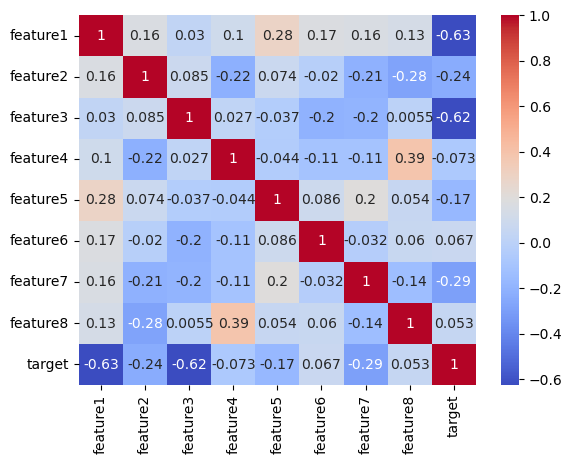

In [19]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

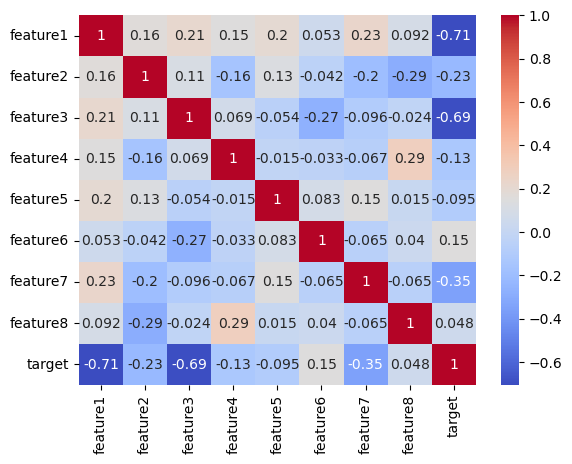

In [21]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  45 non-null     float64
 1   feature2  45 non-null     float64
 2   feature3  45 non-null     float64
 3   feature4  45 non-null     float64
 4   feature5  45 non-null     float64
 5   feature6  45 non-null     float64
 6   feature7  45 non-null     float64
 7   feature8  45 non-null     float64
 8   target    45 non-null     float64
dtypes: float64(9)
memory usage: 3.3 KB


In [25]:
orig_df.describe()

feature1   feature2   feature3   feature4   feature5   feature6  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean    0.534609   0.472150   0.515970   0.430449   0.468951   0.460126   
std     0.310676   0.309706   0.282440   0.261479   0.281380   0.277376   
min     0.009077   0.003419   0.022929   0.009043   0.009649   0.022113   
25%     0.302376   0.206189   0.306074   0.179607   0.236969   0.245246   
50%     0.532770   0.540389   0.488684   0.470111   0.411933   0.409715   
75%     0.792979   0.712416   0.732348   0.663788   0.722449   0.706965   
max     0.985945   0.973980   0.998885   0.902986   0.986902   0.990244   

        feature7   feature8     target  
count  40.000000  40.000000  40.000000  
mean    0.579196   0.506720   7.815274  
std     0.257913   0.281347   0.958966  
min     0.035909   0.041956   5.592193  
25%     0.428796   0.294756   7.257810  
50%     0.596949   0.525116   7.889150  
75%     0.770316   0.729496   8.490139  
max     0.992914   0.988755   9.598482

In [27]:
df.describe()

feature1   feature2   feature3   feature4   feature5   feature6  \
count  45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
mean    0.483216   0.466027   0.472656   0.421386   0.477485   0.481339   
std     0.328756   0.301079   0.294218   0.270968   0.277865   0.276761   
min     0.009077   0.003419   0.022929   0.009043   0.009649   0.022113   
25%     0.176150   0.218851   0.238260   0.161404   0.240298   0.252259   
50%     0.481245   0.538286   0.416796   0.452656   0.480619   0.445117   
75%     0.778818   0.653730   0.728030   0.662216   0.719701   0.707909   
max     0.985945   0.973980   0.998885   0.902986   0.986902   0.990244   

        feature7   feature8     target  
count  45.000000  45.000000  45.000000  
mean    0.560495   0.507887   7.995018  
std     0.254070   0.282670   1.041123  
min     0.035909   0.041956   5.592193  
25%     0.410153   0.292472   7.310894  
50%     0.564606   0.525348   7.977685  
75%     0.762483   0.732153   8.830745  
max     0.992914   0.988755   9.711400

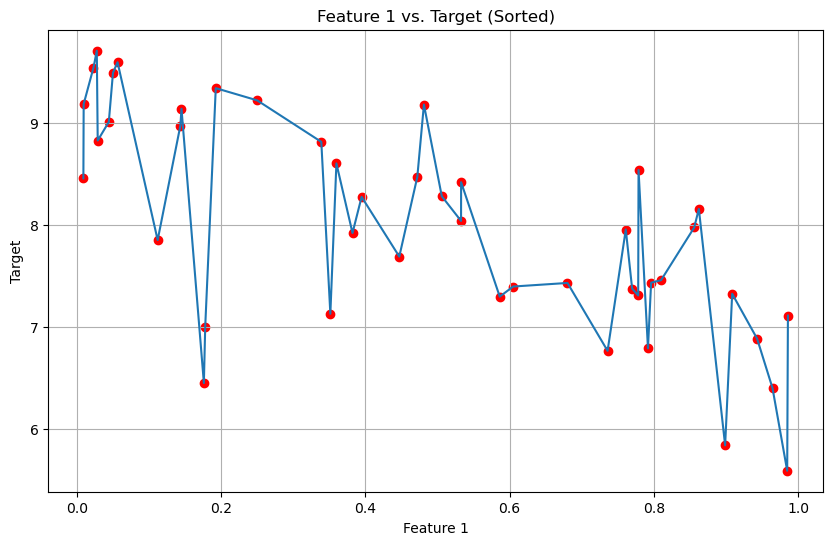

In [29]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

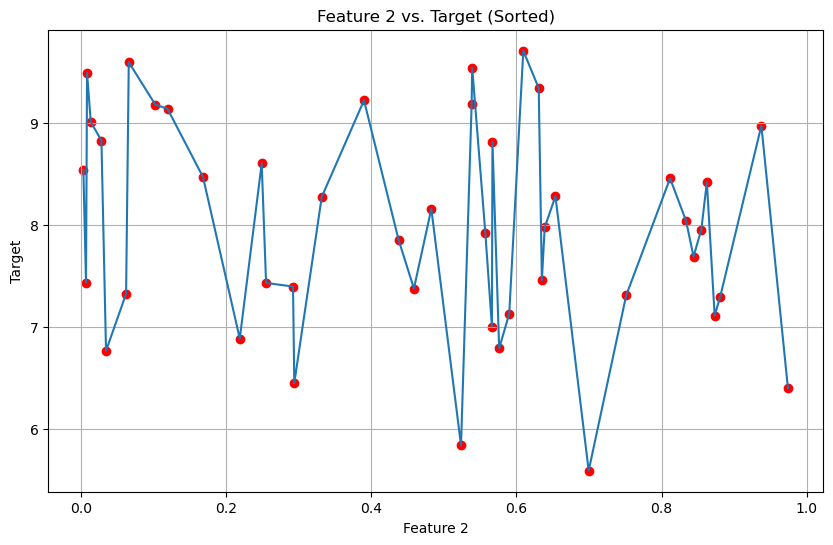

In [31]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

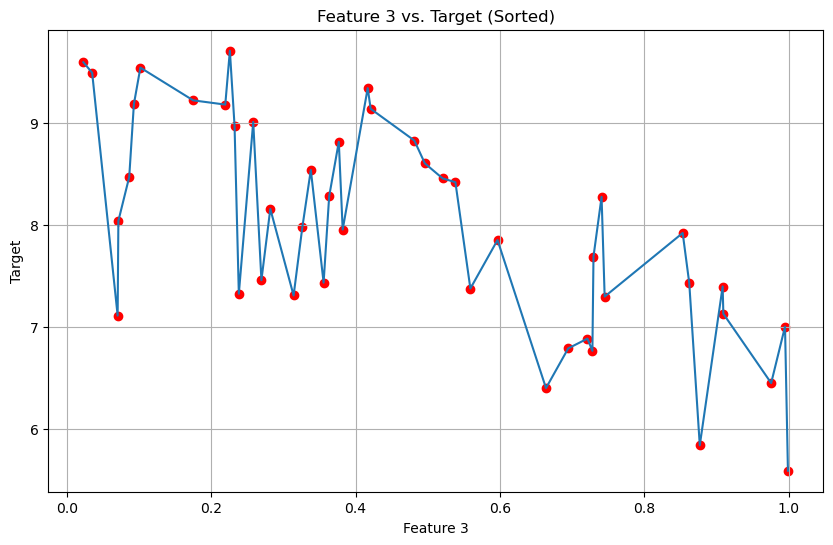

In [33]:
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target (Sorted)')
plt.grid(True)
plt.show()

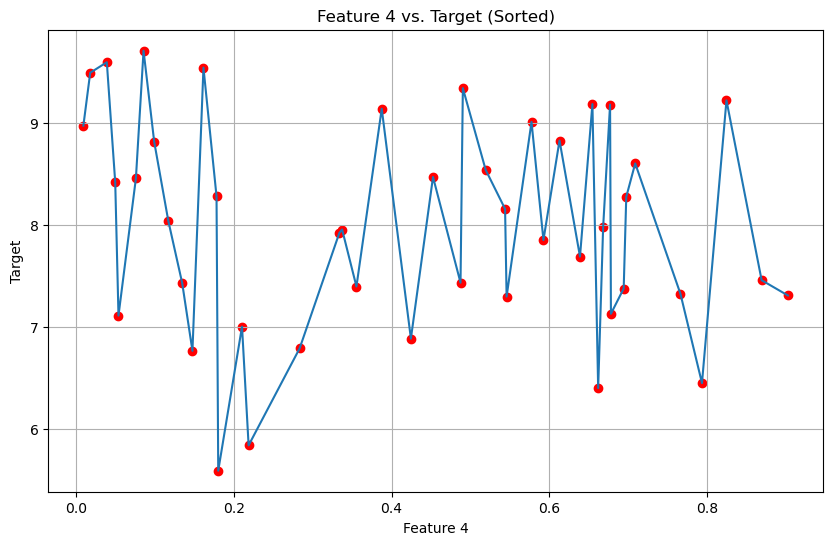

In [35]:
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target (Sorted)')
plt.grid(True)
plt.show()

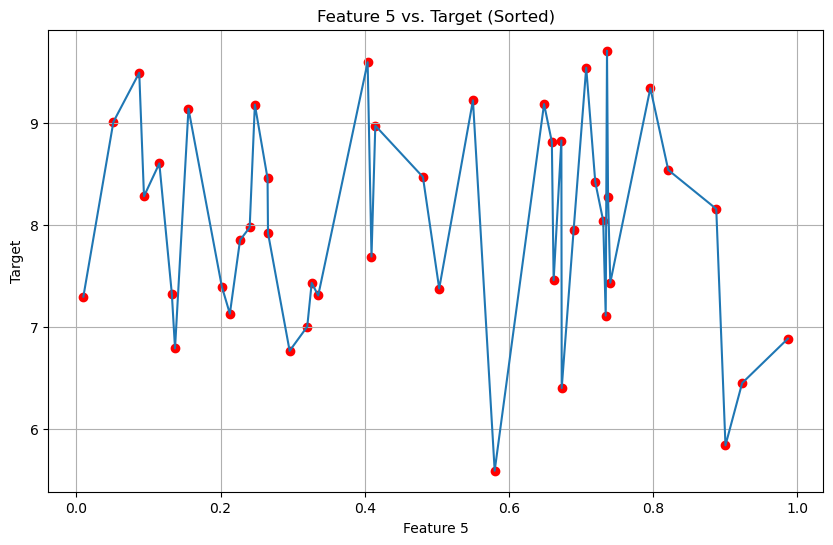

In [37]:
# Sort the DataFrame by 'feature5'
df_sorted = df.sort_values('feature5')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature5'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature5'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 5')
plt.ylabel('Target')
plt.title('Feature 5 vs. Target (Sorted)')
plt.grid(True)
plt.show()

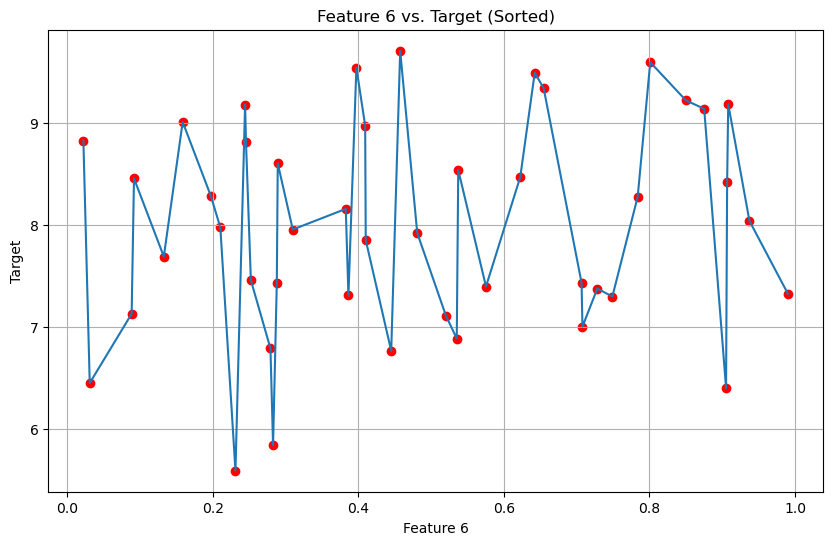

In [39]:
# Sort the DataFrame by 'feature6'
df_sorted = df.sort_values('feature6')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature6'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature6'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 6')
plt.ylabel('Target')
plt.title('Feature 6 vs. Target (Sorted)')
plt.grid(True)
plt.show()

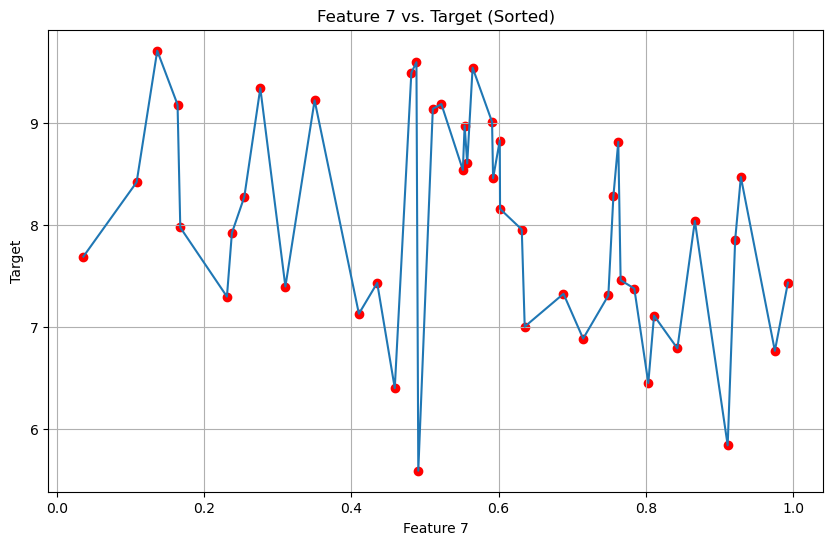

In [41]:
# Sort the DataFrame by 'feature7'
df_sorted = df.sort_values('feature7')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature7'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature7'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 7')
plt.ylabel('Target')
plt.title('Feature 7 vs. Target (Sorted)')
plt.grid(True)
plt.show()

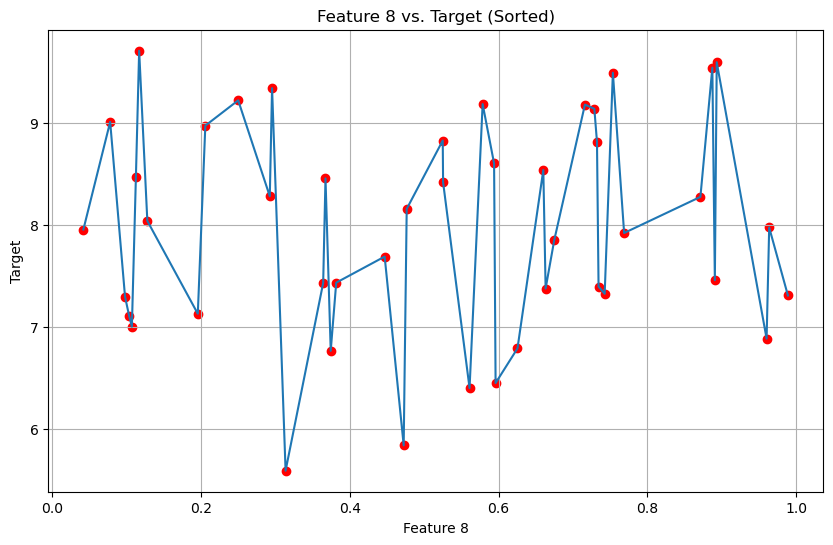

In [43]:
# Sort the DataFrame by 'feature8'
df_sorted = df.sort_values('feature8')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature8'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature8'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 8')
plt.ylabel('Target')
plt.title('Feature 8 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [45]:
print('Running......')

# Define the parameter grid for the Gaussian Process Regressor
#param_grid = {
#    'kernel': [RBF(length_scale=1.0), RBF(length_scale=0.1), RBF(length_scale=0.5), RBF(length_scale=10.0)],
#    'alpha': [1e-10, 1e-5, 1e-2],
#    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
#    'normalize_y': [True],
#}

param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}

# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Prepare the data
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_gpr = grid_search.best_estimator_

# Use the best estimator to predict the target variable
y_pred = best_gpr.predict(X)

best_gpr

Running......


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: Con

Best parameters: {'alpha': 0.01, 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 10, 'normalize_y': True}
Best score: -0.8646438500683878


GaussianProcessRegressor(alpha=0.01, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, normalize_y=True)

In [47]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(alpha=0.01, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


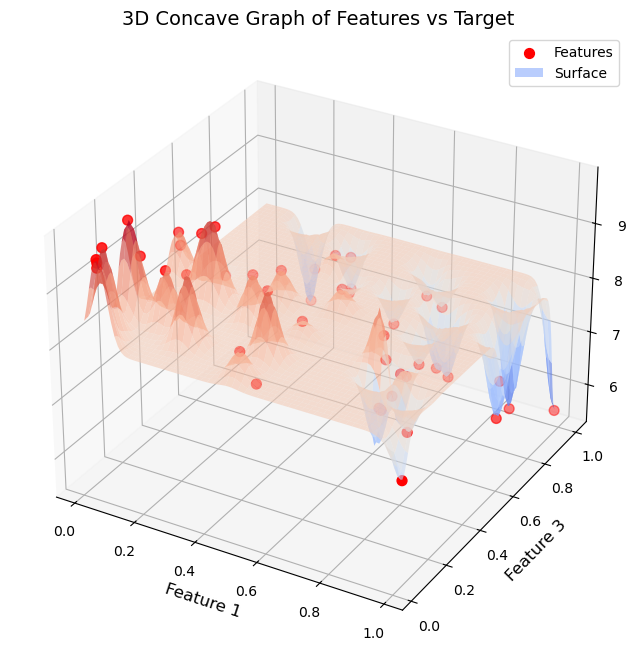

In [49]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature1'], df['feature3'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                   np.linspace(df['feature3'].min(), df['feature3'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature1', 'feature3']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 3', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

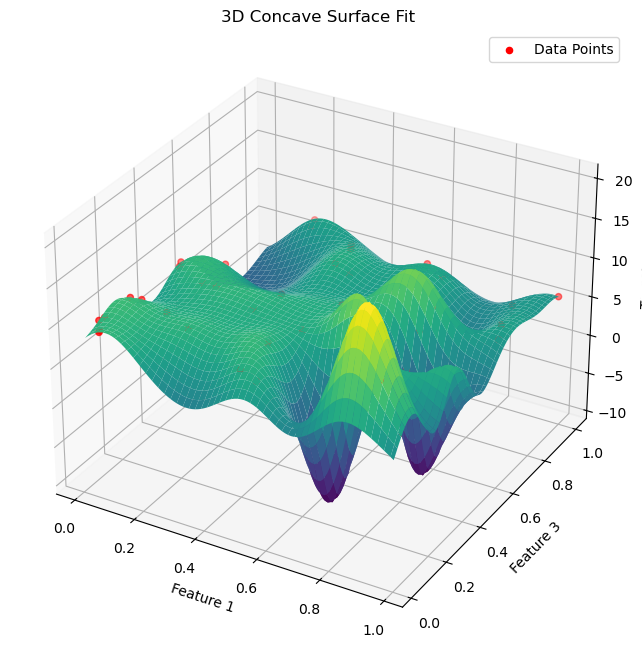

In [51]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature3']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

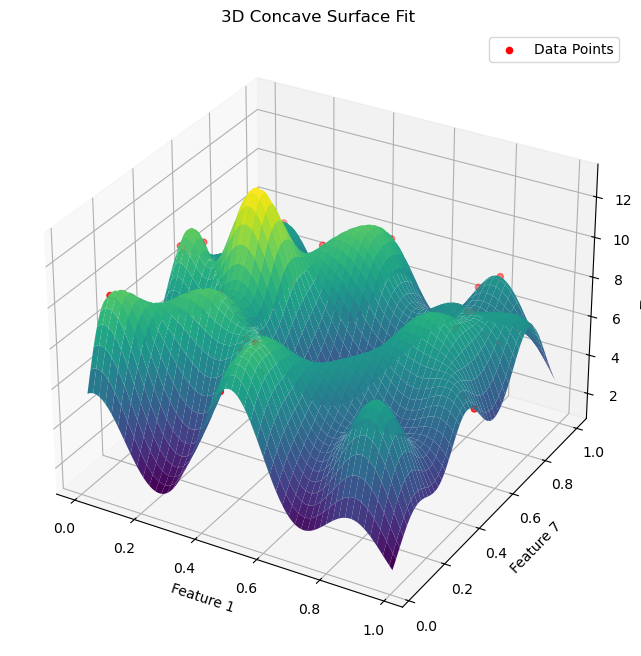

In [53]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature7']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 7')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


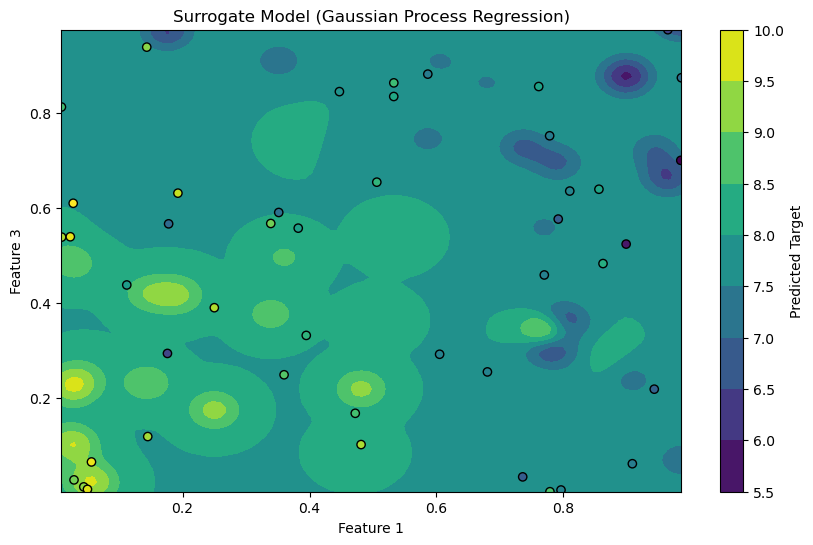

In [55]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature3']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


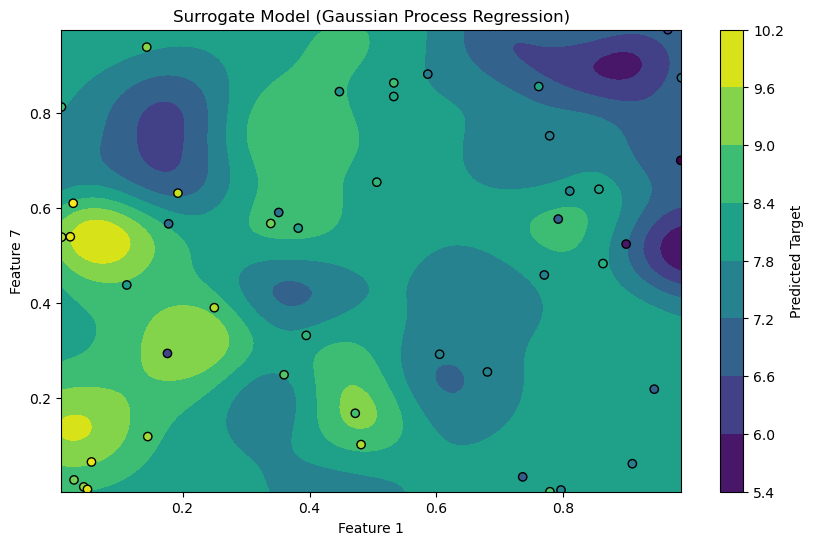

In [57]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature7']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 7')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


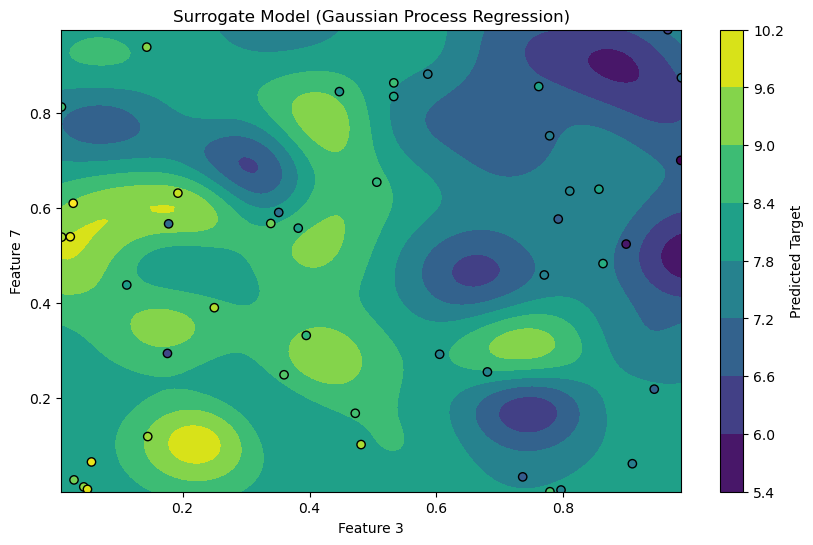

In [59]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature3', 'feature7']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 3')
plt.ylabel('Feature 7')

# Show the plot
plt.show()

In [61]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']
feature7_at_peak = df.loc[peak_index, 'feature7']
feature8_at_peak = df.loc[peak_index, 'feature8']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")
print(f"Feature 5 at peak of target: {feature7_at_peak}")
print(f"Feature 6 at peak of target: {feature8_at_peak}")

Feature 1 at peak of target: 0.027672
Feature 2 at peak of target: 0.609423
Feature 3 at peak of target: 0.22585
Feature 4 at peak of target: 0.085386
Feature 5 at peak of target: 0.735948
Feature 6 at peak of target: 0.457442
Feature 5 at peak of target: 0.136238
Feature 6 at peak of target: 0.116908


In [63]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']
feature7_at_peak = df.loc[peak_index, 'feature7']
feature8_at_peak = df.loc[peak_index, 'feature8']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")
print(f"Feature 5 at peak of target: {feature7_at_peak}")
print(f"Feature 6 at peak of target: {feature8_at_peak}")

Feature 1 at peak of target: 0.9849332023684456
Feature 2 at peak of target: 0.699506257510517
Feature 3 at peak of target: 0.9988854968558359
Feature 4 at peak of target: 0.1801484564734902
Feature 5 at peak of target: 0.5801431474590741
Feature 6 at peak of target: 0.23108719071812645
Feature 5 at peak of target: 0.49082693604016725
Feature 6 at peak of target: 0.3136827199071327


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


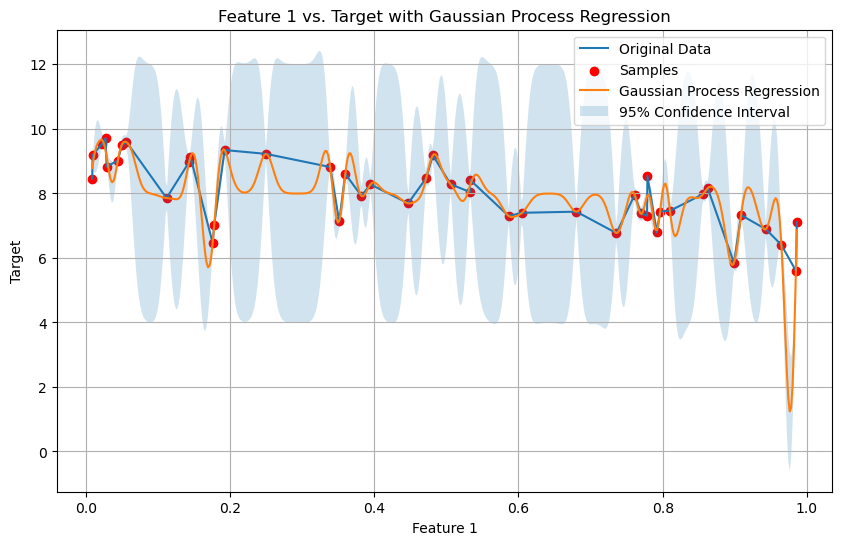

1.99**2 * RBF(length_scale=0.01)


In [65]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
#  Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)


# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


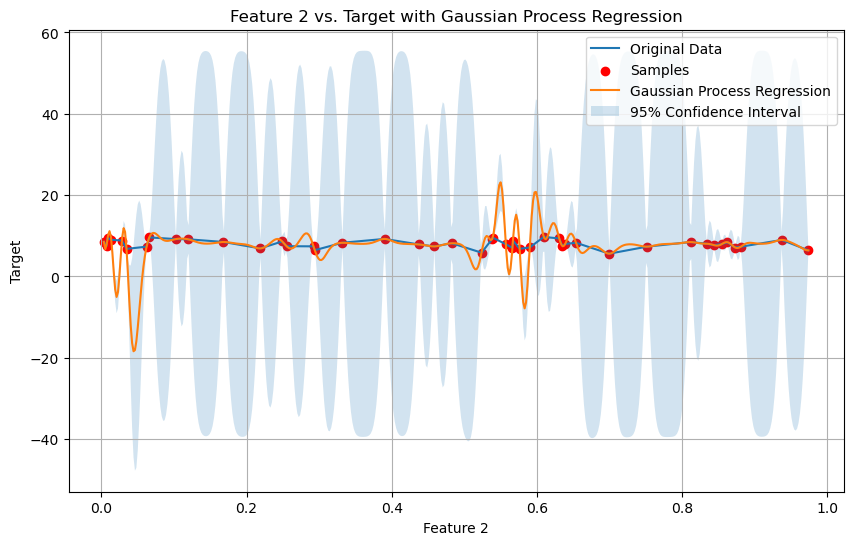

23.5**2 * RBF(length_scale=0.01)


In [67]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


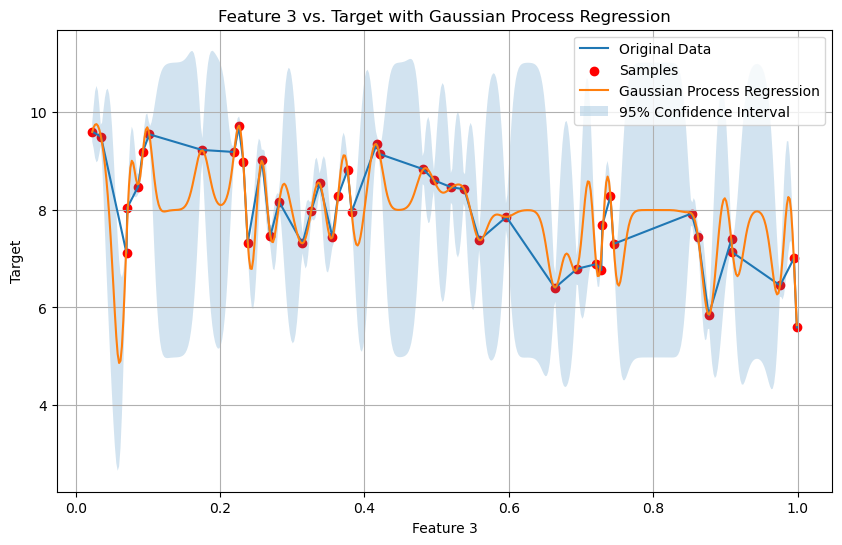

1.5**2 * RBF(length_scale=0.01)


In [69]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature3']].values  # Use only 'feature3' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


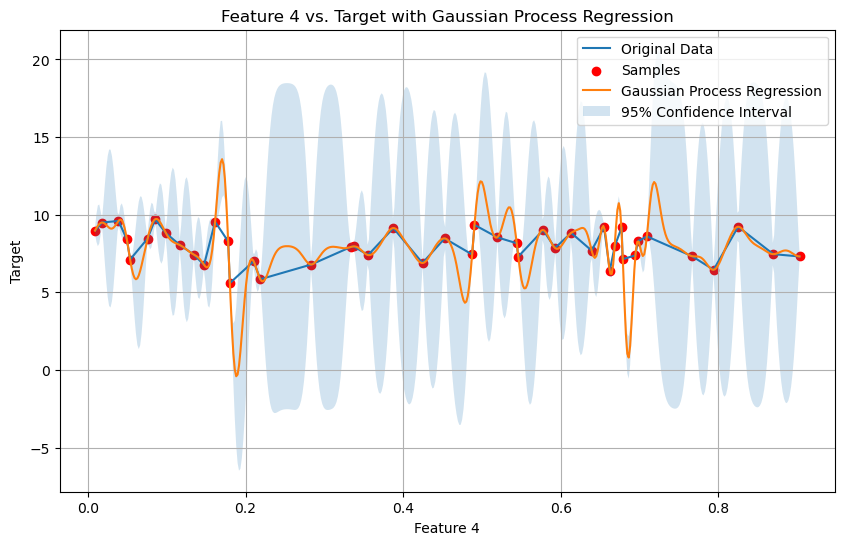

5.21**2 * RBF(length_scale=0.01)


In [71]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature4']].values  # Use only 'feature4' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


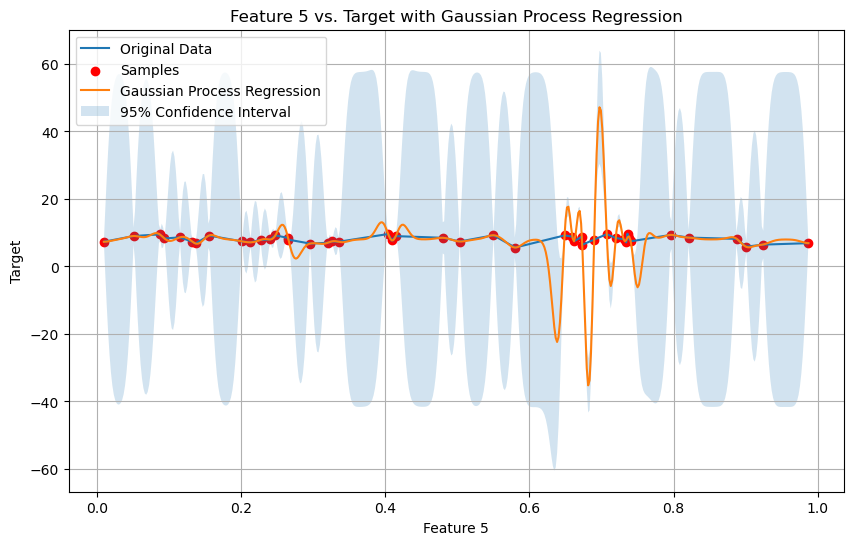

24.6**2 * RBF(length_scale=0.01)


In [73]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature5'
df_sorted = df.sort_values('feature5')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature5']].values  # Use only 'feature5' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature5'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature5'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 5')
plt.ylabel('Target')
plt.title('Feature 5 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


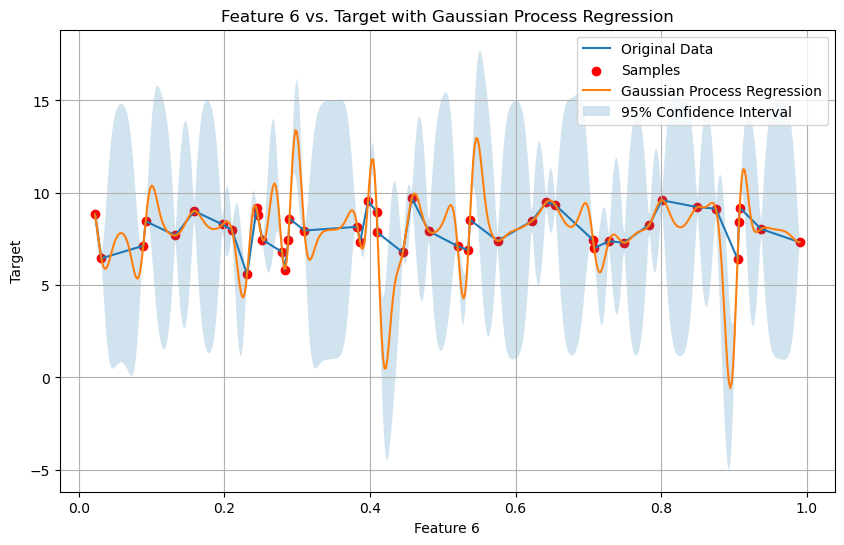

3.47**2 * RBF(length_scale=0.01)


In [75]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature6'
df_sorted = df.sort_values('feature6')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature6']].values  # Use only 'feature6' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature6'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature6'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 6')
plt.ylabel('Target')
plt.title('Feature 6 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


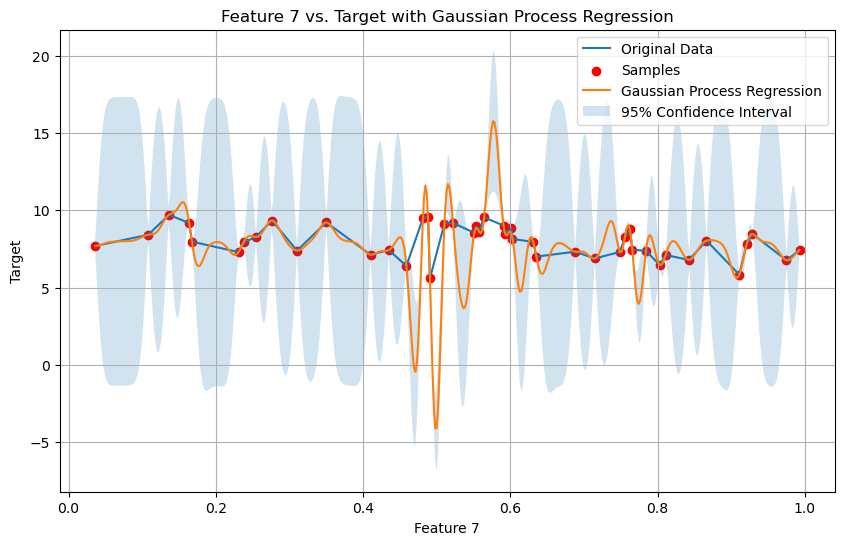

4.63**2 * RBF(length_scale=0.01)


In [77]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature7'
df_sorted = df.sort_values('feature7')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature7']].values  # Use only 'feature7' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature7'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature7'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 7')
plt.ylabel('Target')
plt.title('Feature 7 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


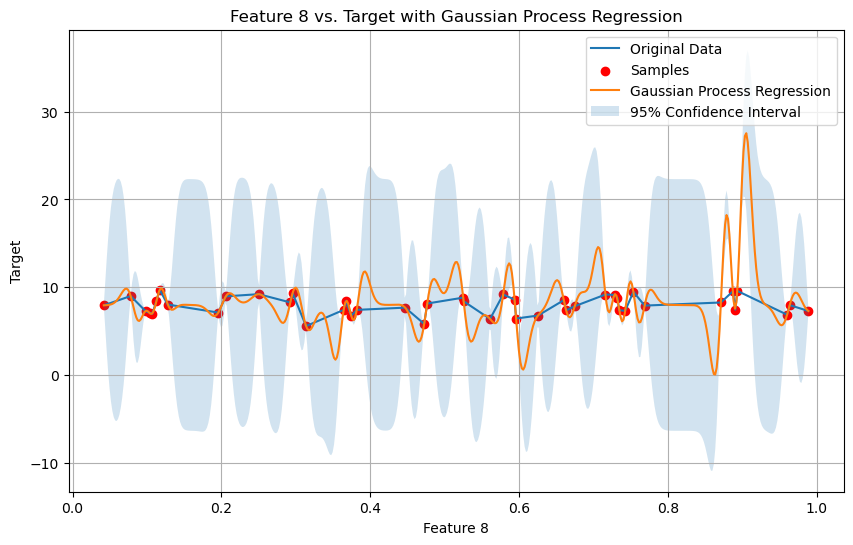

7.09**2 * RBF(length_scale=0.01)


In [79]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature8'
df_sorted = df.sort_values('feature8')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature8']].values  # Use only 'feature8' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature8'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature8'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 8')
plt.ylabel('Target')
plt.title('Feature 8 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


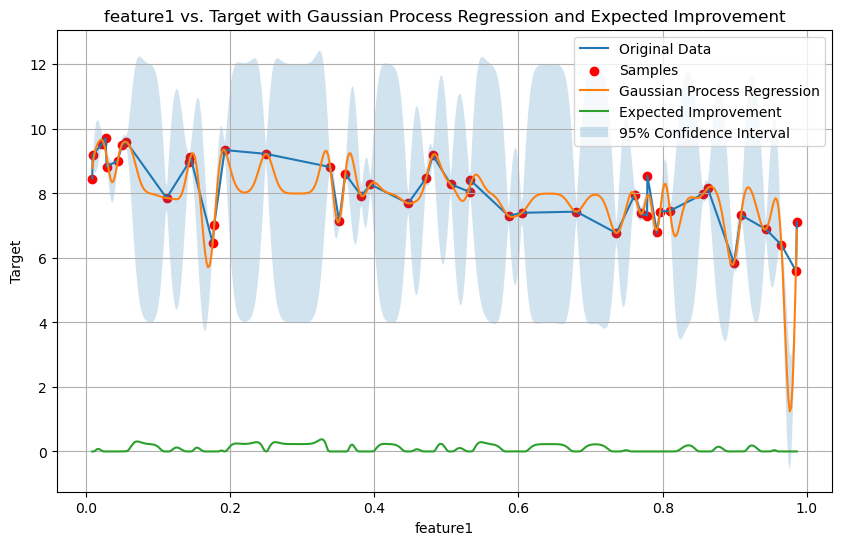

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


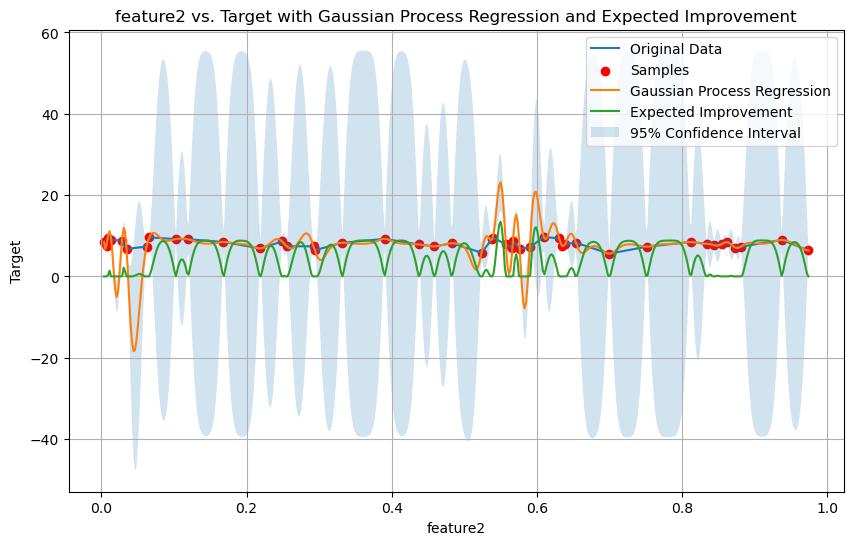

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


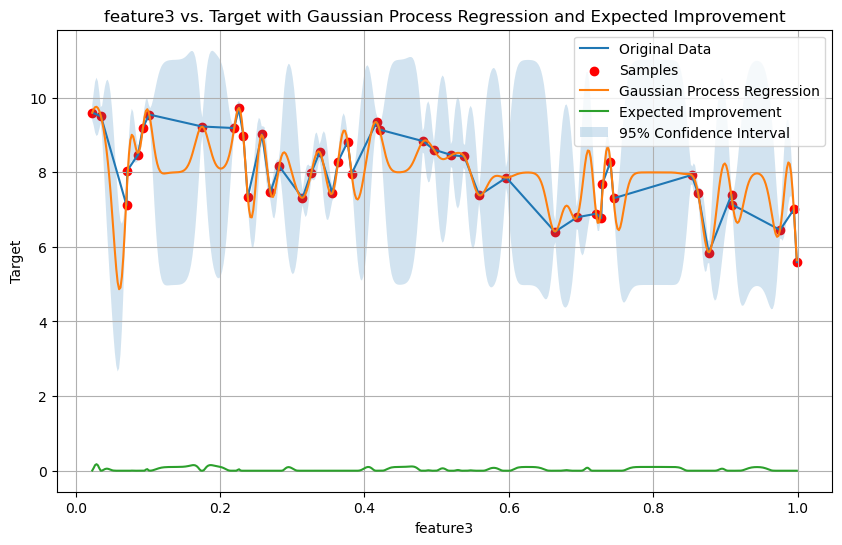

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


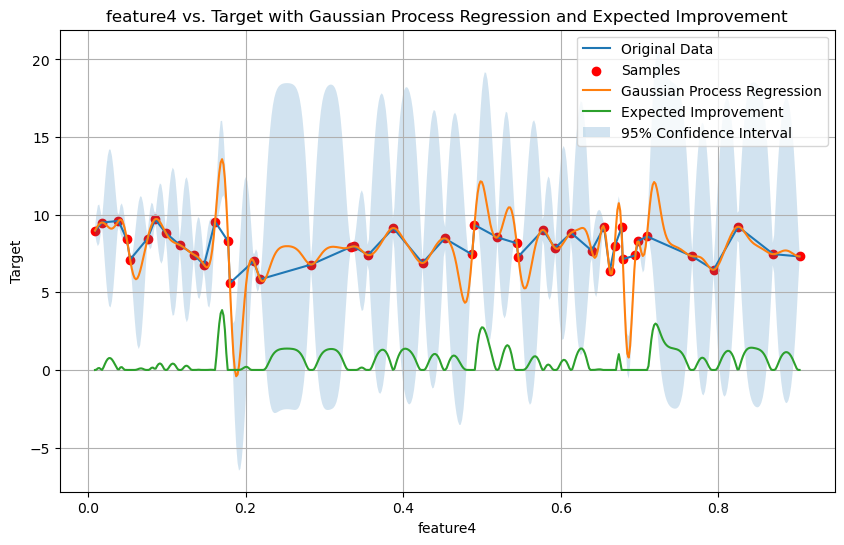

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


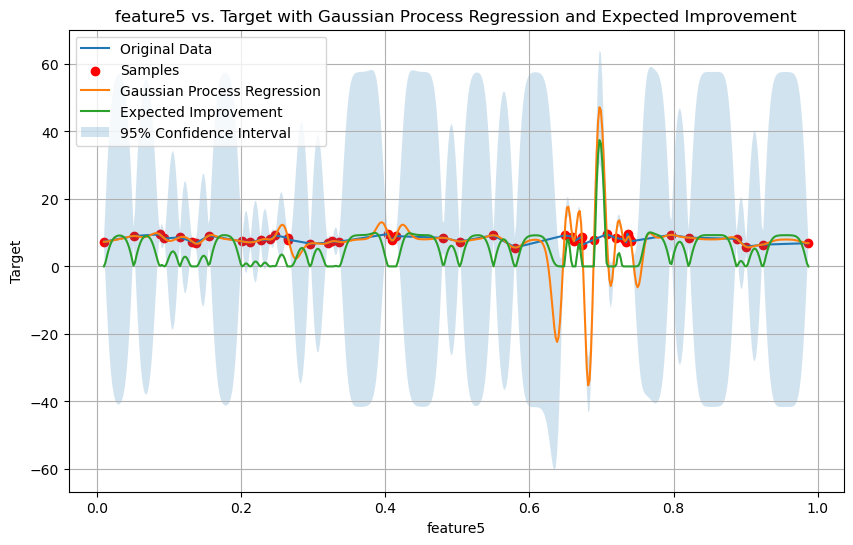

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


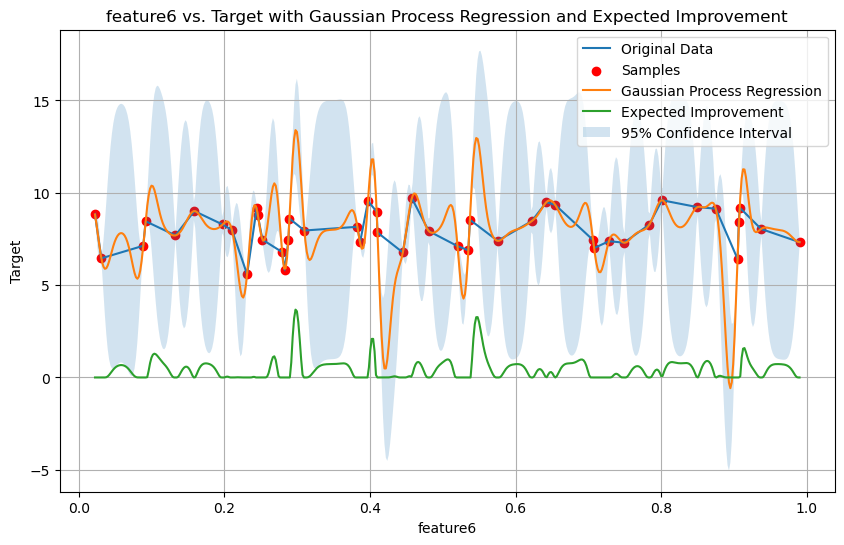

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


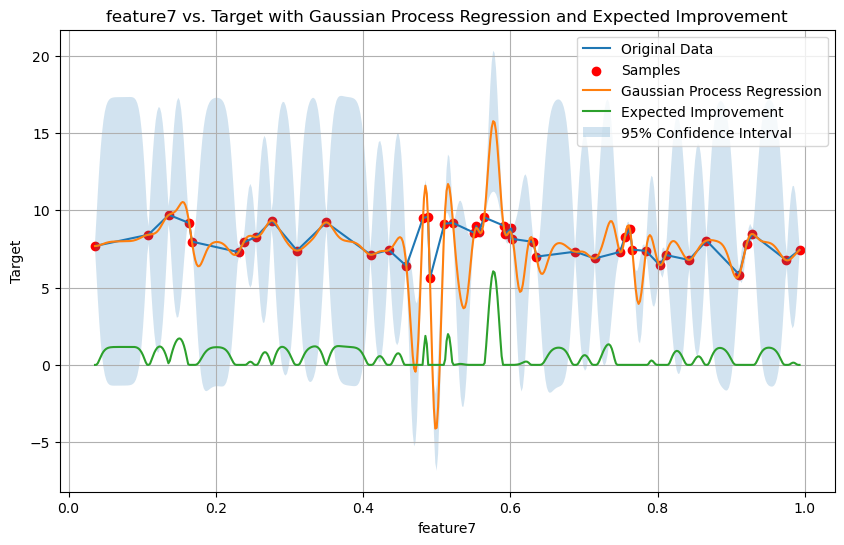

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


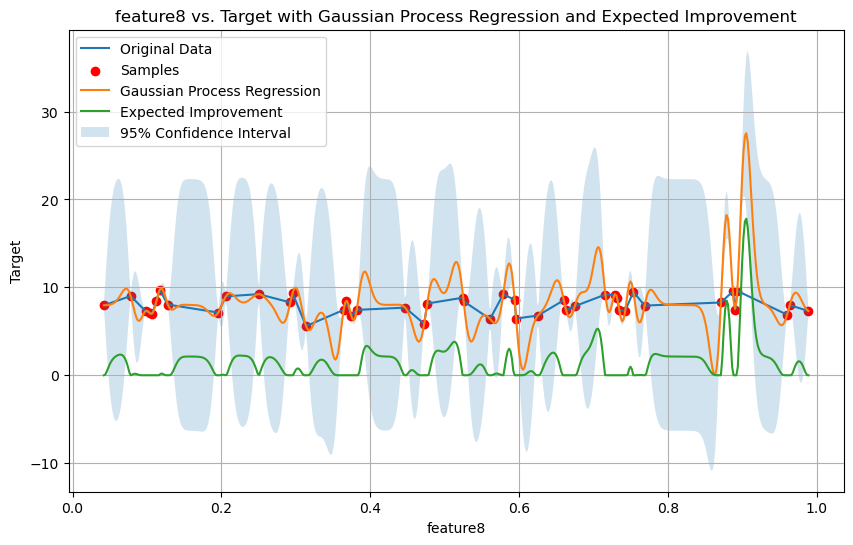

7.09**2 * RBF(length_scale=0.01)

In [81]:
# Assuming df is already defined as in your provided code
from scipy.stats import norm
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Expected Improvement
    y_best = np.max(y)  # Current best observed target value
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ei, label='Expected Improvement') #Plot EI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Expected Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

gpr.kernel_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


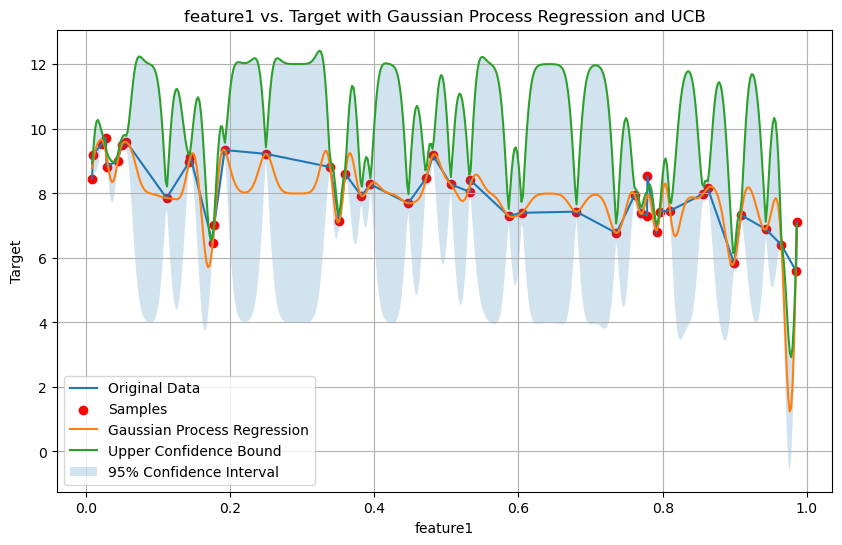

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


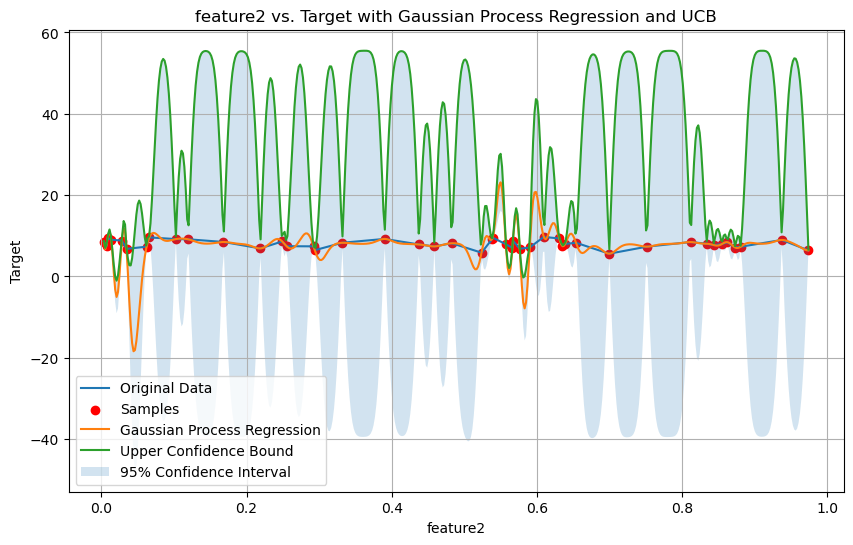

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


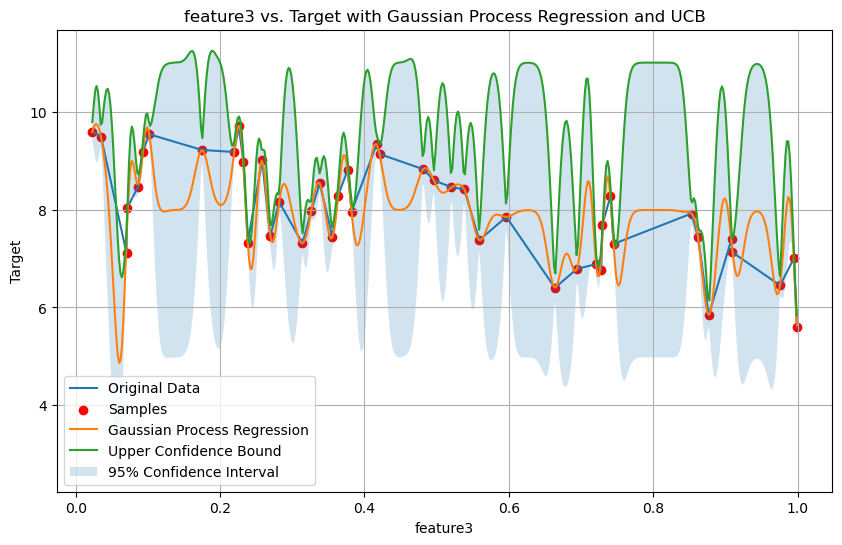

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


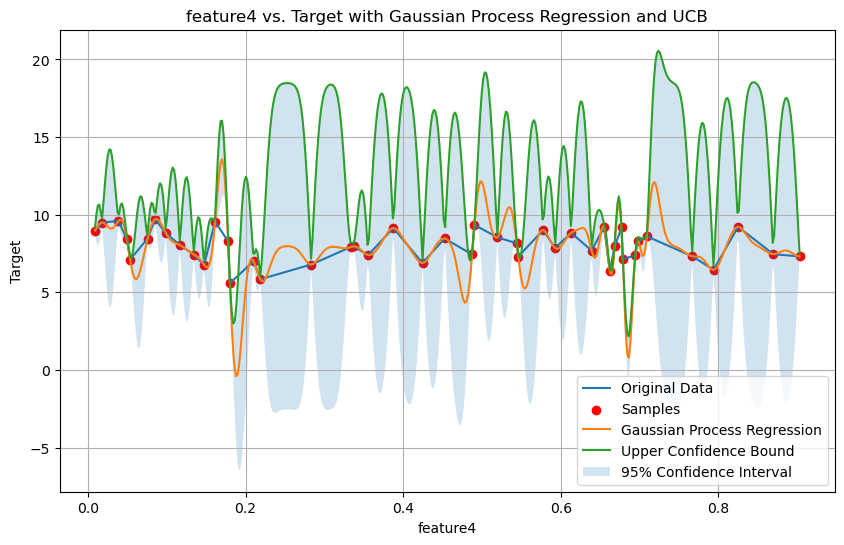

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


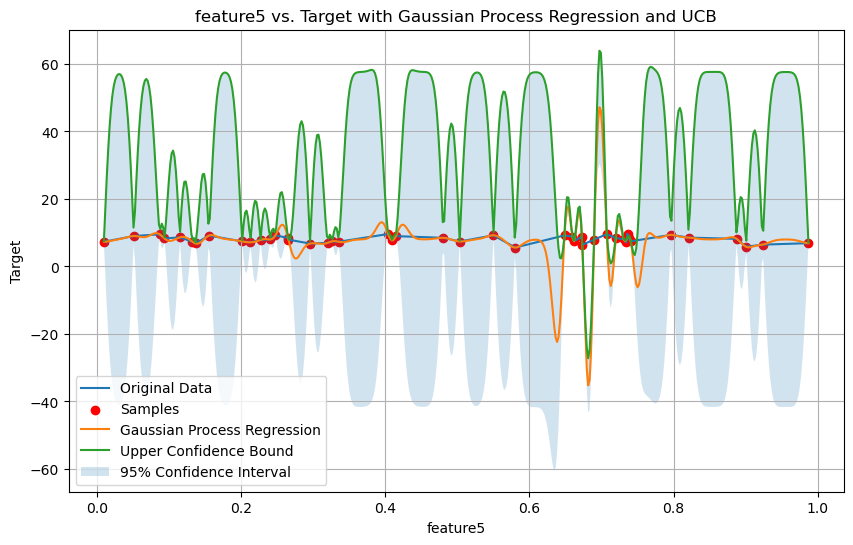

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


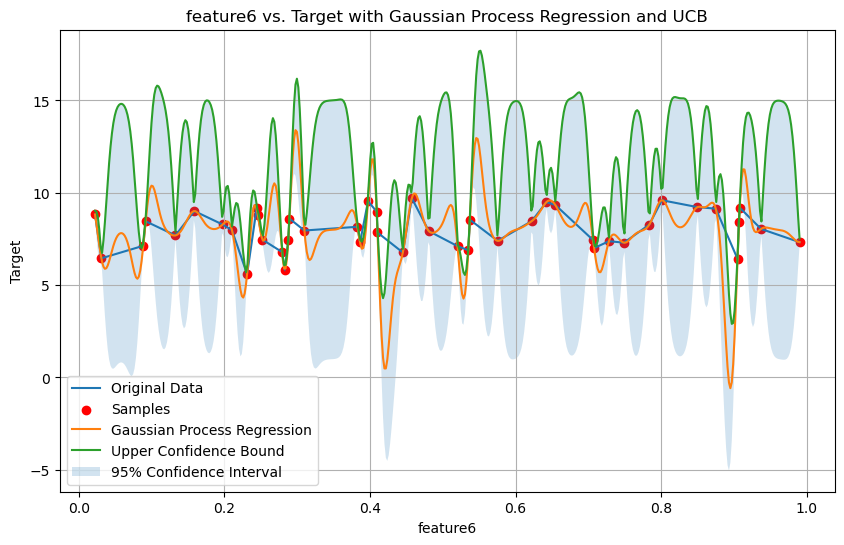

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


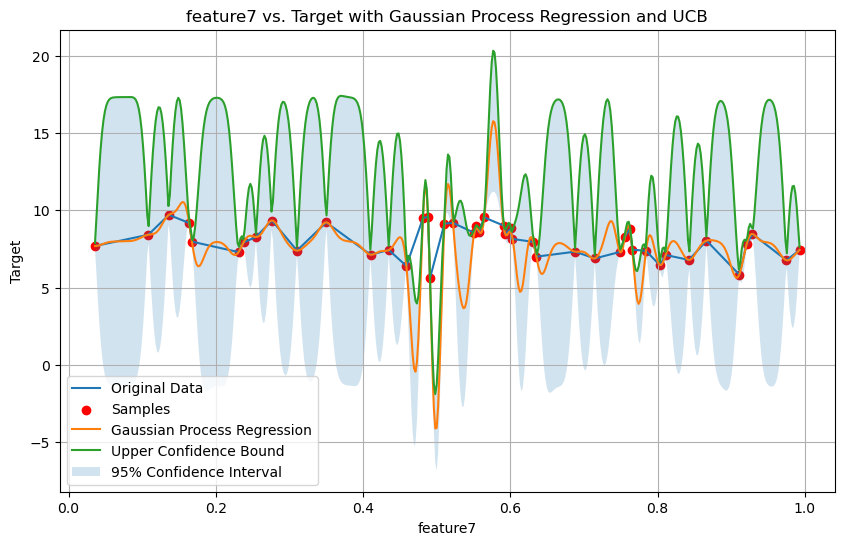

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


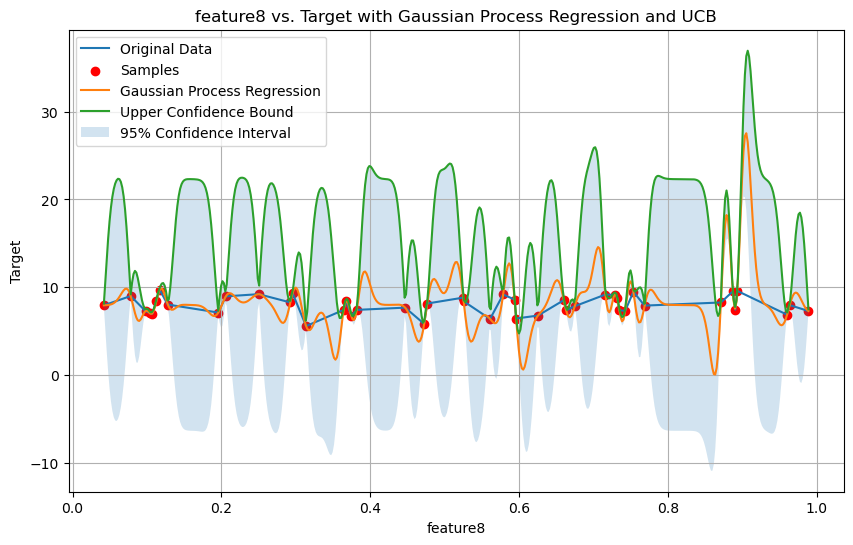

In [83]:
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Upper Confidence Bound (UCB)
    # Adjust the exploration parameter (kappa) as needed
    kappa = 1.96  # For approximately 95% confidence
    ucb = y_pred + kappa * sigma

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ucb, label='Upper Confidence Bound')  # Plot UCB
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and UCB')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


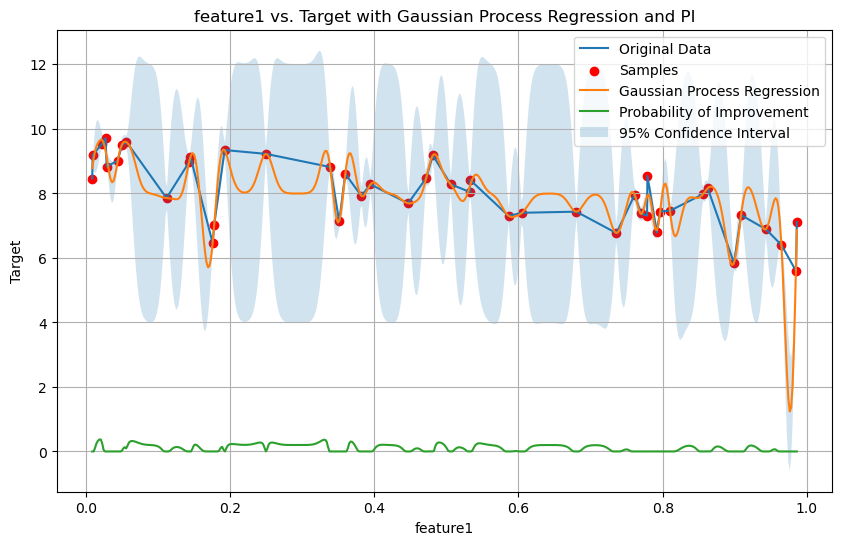

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


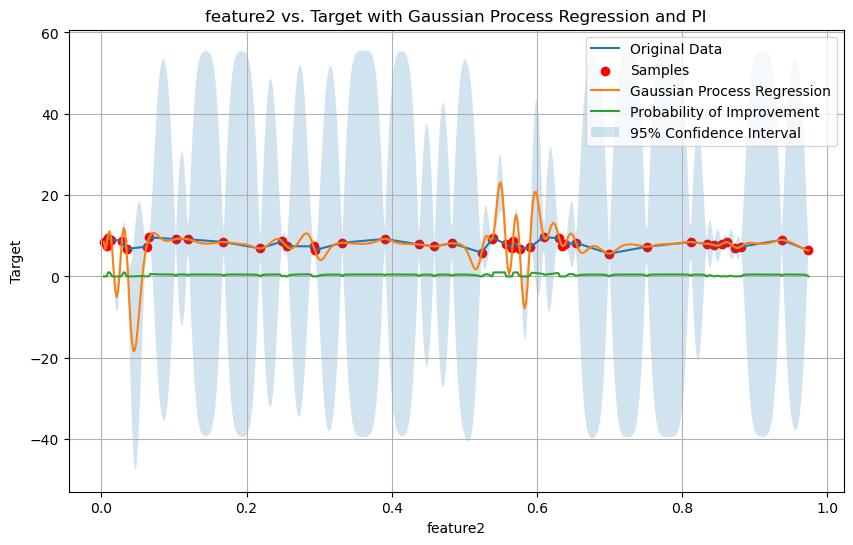

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


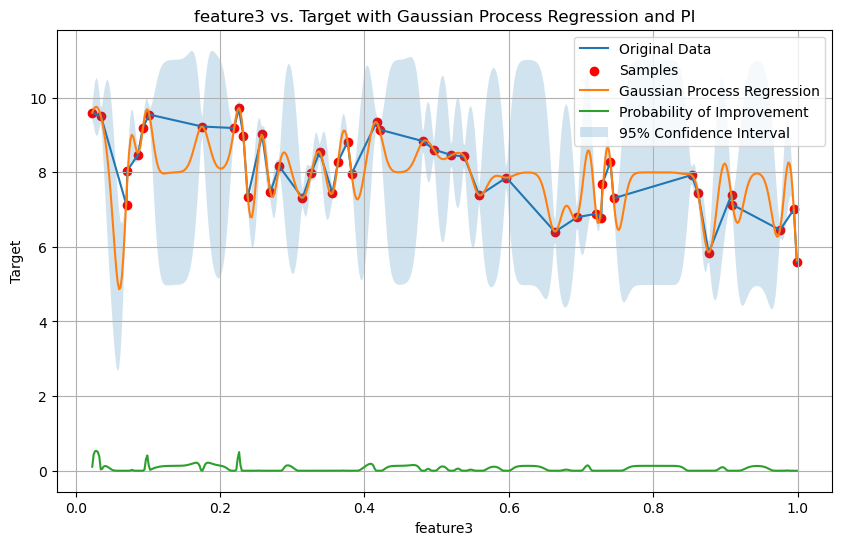

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


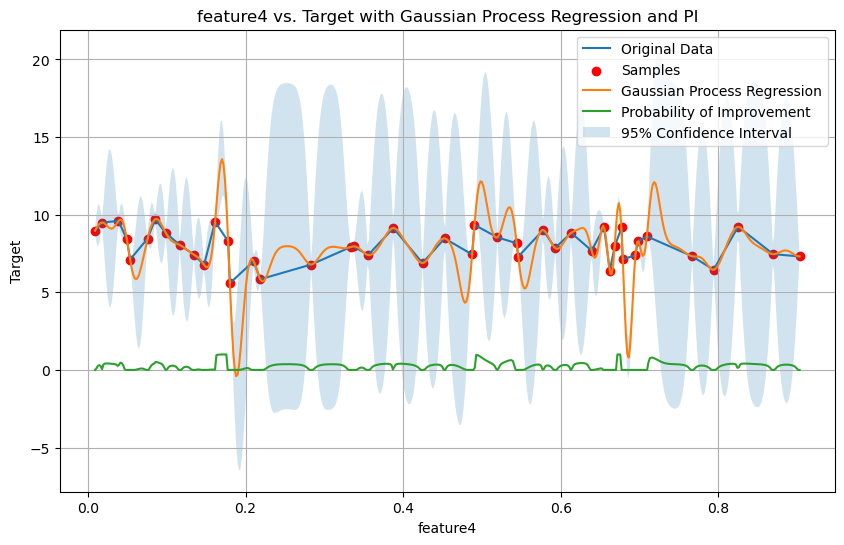

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


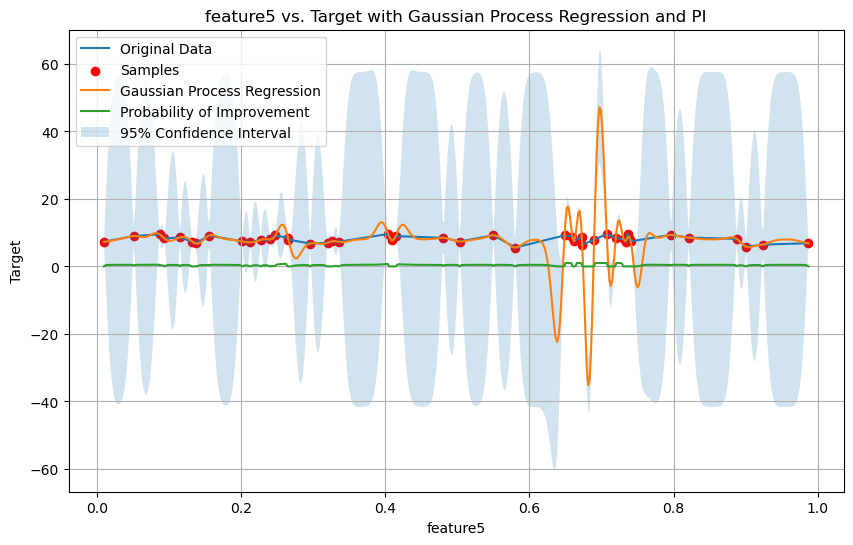

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


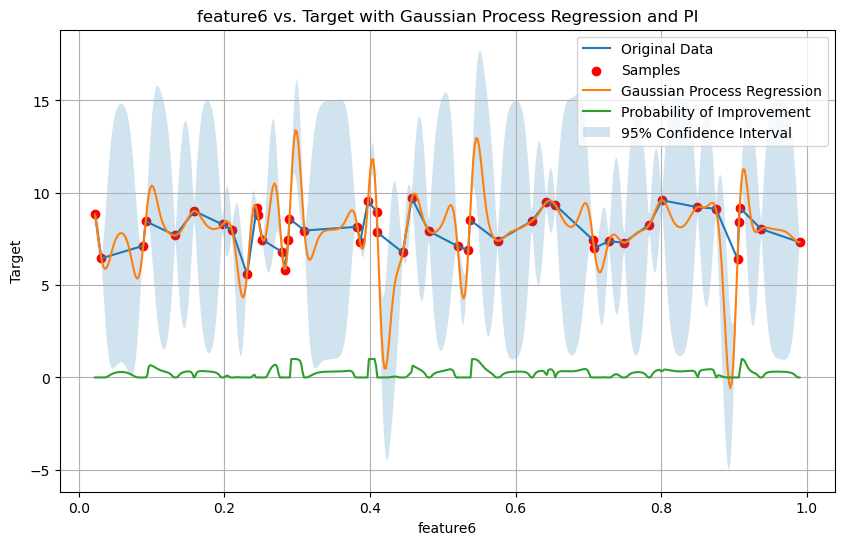

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


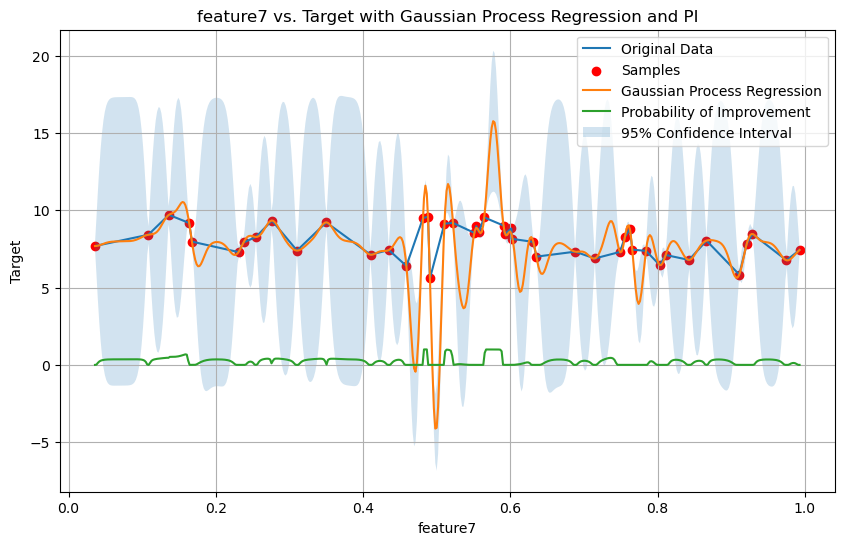

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


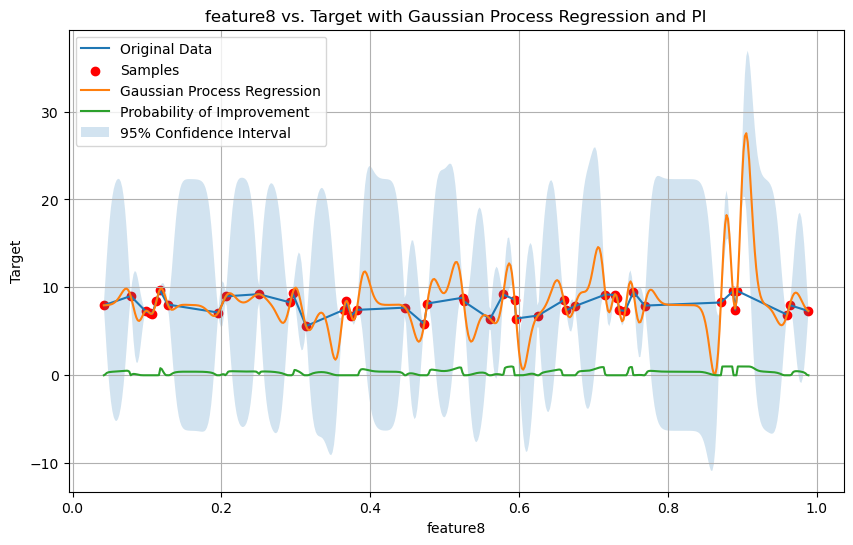

In [85]:
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Probability of Improvement (PI)
    y_best = np.max(y)  # Current best observed target value
    xi = 0.01  # Exploration-exploitation trade-off parameter
    pi = norm.cdf((y_pred - y_best - xi) / sigma)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, pi, label='Probability of Improvement')  # Plot PI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and PI')
    plt.legend()
    plt.grid(True)
    plt.show()

In [87]:
print('Running.........')

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    y_best = np.max(y)

    # Calculate Expected Improvement
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)
    best_ei_index = np.argmax(ei)
    best_ei_feature1_value = X_pred[best_ei_index][0]
    print(f"For {feature}, best feature1 value for Expected Improvement: {best_ei_feature1_value}")


    #Calculate Upper Confidence Bound
    kappa = 1.96
    ucb = y_pred + kappa * sigma
    best_ucb_index = np.argmax(ucb)
    best_ucb_feature1_value = X_pred[best_ucb_index][0]
    print(f"For {feature}, best feature1 value for Upper Confidence Bound: {best_ucb_feature1_value}")

    # Calculate Probability of Improvement
    xi = 0.01
    pi = norm.cdf((y_pred - y_best - xi) / sigma)
    best_pi_index = np.argmax(pi)
    best_pi_feature1_value = X_pred[best_pi_index][0]
    print(f"For {feature}, best feature1 value for Probability of Improvement: {best_pi_feature1_value}")

Running.........
For feature1, best feature1 value for Expected Improvement: 0.328174273897639
For feature1, best feature1 value for Upper Confidence Bound: 0.3242589696373088
For feature1, best feature1 value for Probability of Improvement: 0.020822889461719594
For feature2, best feature1 value for Expected Improvement: 0.5499674773001401
For feature2, best feature1 value for Upper Confidence Bound: 0.9097944377840331
For feature2, best feature1 value for Probability of Improvement: 0.5694175832722423
For feature3, best feature1 value for Expected Improvement: 0.028796153854471727
For feature3, best feature1 value for Upper Confidence Bound: 0.18917382749582629
For feature3, best feature1 value for Probability of Improvement: 0.028796153854471727


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: Con

For feature4, best feature1 value for Expected Improvement: 0.17027556163515575
For feature4, best feature1 value for Upper Confidence Bound: 0.7238390233758869
For feature4, best feature1 value for Probability of Improvement: 0.6736779329916136
For feature5, best feature1 value for Expected Improvement: 0.6970553823926583
For feature5, best feature1 value for Upper Confidence Bound: 0.6970553823926583
For feature5, best feature1 value for Probability of Improvement: 0.667679036050739
For feature6, best feature1 value for Expected Improvement: 0.2976134426780035
For feature6, best feature1 value for Upper Confidence Bound: 0.5517719264107833
For feature6, best feature1 value for Probability of Improvement: 0.40238106192663026
For feature7, best feature1 value for Expected Improvement: 0.5767417108168937
For feature7, best feature1 value for Upper Confidence Bound: 0.5767417108168937
For feature7, best feature1 value for Probability of Improvement: 0.4846850581109619


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: Con

For feature8, best feature1 value for Expected Improvement: 0.9052698186189833
For feature8, best feature1 value for Upper Confidence Bound: 0.9071672114742843
For feature8, best feature1 value for Probability of Improvement: 0.8843984972106721


In [89]:
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    y_best = np.max(y)

    # Calculate Expected Improvement
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)
    best_ei_index = np.argmax(ei)
    best_ei_feature_value = X_pred[best_ei_index][0]
    print(f"For {feature}, best feature value for Expected Improvement: {best_ei_feature_value:.6f}")


    #Calculate Upper Confidence Bound
    kappa = 1.96
    ucb = y_pred + kappa * sigma
    best_ucb_index = np.argmax(ucb)
    best_ucb_feature_value = X_pred[best_ucb_index][0]
    print(f"For {feature}, best feature value for Upper Confidence Bound: {best_ucb_feature_value:.6f}")

    # Calculate Probability of Improvement
    xi = 0.01
    pi = norm.cdf((y_pred - y_best - xi) / sigma)
    best_pi_index = np.argmax(pi)
    best_pi_feature_value = X_pred[best_pi_index][0]
    print(f"For {feature}, best feature value for Probability of Improvement: {best_pi_feature_value:.6f}")

    #Create a new data array (example)
    new_data = np.array([best_ei_feature_value, best_ucb_feature_value, best_pi_feature_value])
    print(f"New Data Array for {feature}: {new_data}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: Con

For feature1, best feature value for Expected Improvement: 0.328174
For feature1, best feature value for Upper Confidence Bound: 0.324259
For feature1, best feature value for Probability of Improvement: 0.020823
New Data Array for feature1: [0.32817427 0.32425897 0.02082289]
For feature2, best feature value for Expected Improvement: 0.549967
For feature2, best feature value for Upper Confidence Bound: 0.909794
For feature2, best feature value for Probability of Improvement: 0.569418
New Data Array for feature2: [0.54996748 0.90979444 0.56941758]
For feature3, best feature value for Expected Improvement: 0.028796
For feature3, best feature value for Upper Confidence Bound: 0.189174
For feature3, best feature value for Probability of Improvement: 0.028796
New Data Array for feature3: [0.02879615 0.18917383 0.02879615]
For feature4, best feature value for Expected Improvement: 0.170276
For feature4, best feature value for Upper Confidence Bound: 0.723839
For feature4, best feature value f

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [91]:
best_feature_values = {}

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    
    # Use the prediction with the highest value (you can change the acquisition function if needed)
    best_index = np.argmax(y_pred)
    best_feature_value = X_pred[best_index][0]
    best_feature_values[feature] = best_feature_value

# Create a new data array with the best values
new_data_array = np.array(list(best_feature_values.values()))

# Display the results formatted to six significant figures
print("Single Best Values for Each Feature (6 significant figures):")
for feature, value in best_feature_values.items():
    print(f"{feature}: {value:.6f}")

print("\nNew Data Array:")
new_data_array

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: Con

Single Best Values for Each Feature (6 significant figures):
feature1: 0.020823
feature2: 0.549967
feature3: 0.028796
feature4: 0.170276
feature5: 0.697055
feature6: 0.297613
feature7: 0.576742
feature8: 0.905270

New Data Array:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


array([0.02082289, 0.54996748, 0.02879615, 0.17027556, 0.69705538,
       0.29761344, 0.57674171, 0.90526982])

In [93]:
inputs

array([[0.60499445, 0.29221502, 0.90845275, 0.35550624, 0.20166872,
        0.57533801, 0.31031095, 0.73428138],
       [0.17800696, 0.56622265, 0.99486184, 0.21032501, 0.32015266,
        0.70790879, 0.63538449, 0.10713163],
       [0.00907698, 0.81162615, 0.52052036, 0.07568668, 0.26511183,
        0.09165169, 0.59241515, 0.36732026],
       [0.50602816, 0.65373012, 0.36341078, 0.17798105, 0.0937283 ,
        0.19742533, 0.7558269 , 0.29247234],
       [0.35990926, 0.24907568, 0.49599717, 0.70921498, 0.11498719,
        0.28920692, 0.55729515, 0.59388173],
       [0.77881834, 0.0034195 , 0.33798313, 0.51952778, 0.82090699,
        0.53724669, 0.5513471 , 0.66003209],
       [0.90864932, 0.0622497 , 0.23825955, 0.76660355, 0.13233596,
        0.99024381, 0.68806782, 0.74249594],
       [0.58637144, 0.88073573, 0.74502075, 0.54603485, 0.00964888,
        0.74899176, 0.23090707, 0.09791562],
       [0.76113733, 0.85467239, 0.38212433, 0.33735198, 0.68970832,
        0.30985305, 0.631379

In [95]:
# Add the new data points
next_inputs = np.vstack([inputs, new_data_array])

len(next_inputs), len(inputs)

(46, 45)

In [97]:
next_inputs

array([[0.60499445, 0.29221502, 0.90845275, 0.35550624, 0.20166872,
        0.57533801, 0.31031095, 0.73428138],
       [0.17800696, 0.56622265, 0.99486184, 0.21032501, 0.32015266,
        0.70790879, 0.63538449, 0.10713163],
       [0.00907698, 0.81162615, 0.52052036, 0.07568668, 0.26511183,
        0.09165169, 0.59241515, 0.36732026],
       [0.50602816, 0.65373012, 0.36341078, 0.17798105, 0.0937283 ,
        0.19742533, 0.7558269 , 0.29247234],
       [0.35990926, 0.24907568, 0.49599717, 0.70921498, 0.11498719,
        0.28920692, 0.55729515, 0.59388173],
       [0.77881834, 0.0034195 , 0.33798313, 0.51952778, 0.82090699,
        0.53724669, 0.5513471 , 0.66003209],
       [0.90864932, 0.0622497 , 0.23825955, 0.76660355, 0.13233596,
        0.99024381, 0.68806782, 0.74249594],
       [0.58637144, 0.88073573, 0.74502075, 0.54603485, 0.00964888,
        0.74899176, 0.23090707, 0.09791562],
       [0.76113733, 0.85467239, 0.38212433, 0.33735198, 0.68970832,
        0.30985305, 0.631379

In [99]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = new_data_array
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=8)

print("New Input Data (with noise):", new_input_data)
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.01733663 0.54519009 0.03200217 0.18009004 0.69344201 0.3188001
 0.56823599 0.90617395]
New Input Data (with noise): [0.017337, 0.54519, 0.032002, 0.18009, 0.693442, 0.3188, 0.568236, 0.906174]


In [101]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']
feature7_at_peak = df.loc[peak_index, 'feature7']
feature8_at_peak = df.loc[peak_index, 'feature8']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")
print(f"Feature 7 at peak of target: {feature7_at_peak}")
print(f"Feature 8 at peak of target: {feature8_at_peak}")

Feature 1 at peak of target: 0.027672
Feature 2 at peak of target: 0.609423
Feature 3 at peak of target: 0.22585
Feature 4 at peak of target: 0.085386
Feature 5 at peak of target: 0.735948
Feature 6 at peak of target: 0.457442
Feature 7 at peak of target: 0.136238
Feature 8 at peak of target: 0.116908


In [103]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']
feature7_at_peak = df.loc[peak_index, 'feature7']
feature8_at_peak = df.loc[peak_index, 'feature8']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")
print(f"Feature 8 at peak of target: {feature7_at_peak}")
print(f"Feature 8 at peak of target: {feature8_at_peak}")

Feature 1 at peak of target: 0.9849332023684456
Feature 2 at peak of target: 0.699506257510517
Feature 3 at peak of target: 0.9988854968558359
Feature 4 at peak of target: 0.1801484564734902
Feature 5 at peak of target: 0.5801431474590741
Feature 6 at peak of target: 0.23108719071812645
Feature 8 at peak of target: 0.49082693604016725
Feature 8 at peak of target: 0.3136827199071327


In [105]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.017337, 0.54519, 0.032002, 0.18009, 0.693442, 0.3188, 0.568236, 0.906174]
